# Build a song recommender system

In [1]:
import turicreate as tc

# Load some music data

In [2]:
song_data = tc.SFrame('~/venv/Week 3/song_data.sframe')

# Explore our data

In [3]:
song_data.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


## Show the most popular songs in the dataset

In [4]:
#REMINDER: Do not run this unless display not working
#When Index not found error is thrown for below line 
#restart jupyter notebook enitrely 
#tc.visualization.set_target(target="browser")

song_data['song'].show()

Materializing SArray

# Count the number of unique users in the data

In [8]:
#Total number of songs in the data
len(song_data)

1116609

In [5]:
#Defining unique users in the data set
users = song_data['user_id'].unique()

In [6]:
len(users)

66346

# Create a song recommender

In [9]:
#Taking 80-20 split
#Using seed as 0 for consistency in results from dif users
train_data,test_data = song_data.random_split(.8,seed=0)

## Create a very simple popularity recommender

In [10]:
#Product here is songs
#Based on popularity 
popularity_model = tc.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.481257s

893580 observations to process; with 9952 unique items.

## Use the popularity model to make some predictions

In [11]:
#Songs for user 0 only 
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


In [12]:
#Same recs as it is suggesting the most popular songs
#No personalization 
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Sehr kosmisch - Harmonia,4754.0,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Undo - Björk,4227.0,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,You're The One - DwightYoakam ...,3781.0,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Revelry - Kings Of Leon,3527.0,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Secrets - OneRepublic,3148.0,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Hey_ Soul Sister - Train,2538.0,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Tive Sim - Cartola,2521.0,10


# Build a recommender with personalization

In [13]:
#Giving user id and item id
#this is based on item similarity not item popularity
personalized_model = tc.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.49583s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.542ms                        | 1.5        |

| 19.02ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 355.934ms                           | 4                | 420             |

| 808.305ms                           | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.86449s

## Apply personalized model to make song recommendations

In [14]:
#Song recs change as per personalization
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.030120477080345154,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129693985,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.023002490401268005,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.01939384639263153,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.018987342715263367,10


In [16]:
#User 1 has diff recs as seen
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.04594243764877319,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,There Goes My Baby -Usher ...,0.03319207429885864,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Panty Droppa [Intro](Album Version) - Trey ...,0.03185662031173706,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nobody (Featuring AthenaCage) (LP Version) - ...,0.027846765518188477,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Youth Against Fascism -Sonic Youth ...,0.026291418075561523,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nice & Slow - Usher,0.023963940143585206,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Making Love (Into TheNight) - Usher ...,0.023817694187164305,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Naked - Marques Houston,0.022892570495605467,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,I.nner Indulgence -DESTRUCTION ...,0.022076749801635744,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Love Lost (Album Version)- Trey Songz ...,0.020449769496917725,10


# Apply model to find similar songs in the data set

In [17]:
#As we see, typical suggestions are same songs by the same band
personalized_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [18]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019304990768432617,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.019157111644744873,7
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.018796980381011963,8
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.018796980381011963,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779337406158447,10


# Compare the models quantitatively
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [27]:
import matplotlib.pyplot as plt

PROGRESS: Evaluate model M0


recommendations finished on 1000/58628 queries. users per second: 31306.7

recommendations finished on 2000/58628 queries. users per second: 36476.4

recommendations finished on 3000/58628 queries. users per second: 37388.3

recommendations finished on 4000/58628 queries. users per second: 38016.3

recommendations finished on 5000/58628 queries. users per second: 38668.6

recommendations finished on 6000/58628 queries. users per second: 38027.9

recommendations finished on 7000/58628 queries. users per second: 38501.7

recommendations finished on 8000/58628 queries. users per second: 38313.8

recommendations finished on 9000/58628 queries. users per second: 38873.7

recommendations finished on 10000/58628 queries. users per second: 39173.6

recommendations finished on 11000/58628 queries. users per second: 38281.9

recommendations finished on 12000/58628 queries. users per second: 38457.3

recommendations finished on 13000/58628 queries. users per second: 38334.7

recommendations finished on 14000/58628 queries. users per second: 38195.6

recommendations finished on 15000/58628 queries. users per second: 38427.5

recommendations finished on 16000/58628 queries. users per second: 38357.9

recommendations finished on 17000/58628 queries. users per second: 38396.4

recommendations finished on 18000/58628 queries. users per second: 38530.9

recommendations finished on 19000/58628 queries. users per second: 38454.2

recommendations finished on 20000/58628 queries. users per second: 38000.1

recommendations finished on 21000/58628 queries. users per second: 36708.9

recommendations finished on 22000/58628 queries. users per second: 36490.4

recommendations finished on 23000/58628 queries. users per second: 36385.8

recommendations finished on 24000/58628 queries. users per second: 36461.6

recommendations finished on 25000/58628 queries. users per second: 36400.9

recommendations finished on 26000/58628 queries. users per second: 36430.5

recommendations finished on 27000/58628 queries. users per second: 36498.7

recommendations finished on 28000/58628 queries. users per second: 36608

recommendations finished on 29000/58628 queries. users per second: 36602.2

recommendations finished on 30000/58628 queries. users per second: 36552.4

recommendations finished on 31000/58628 queries. users per second: 36458.5

recommendations finished on 32000/58628 queries. users per second: 36353.8

recommendations finished on 33000/58628 queries. users per second: 36211.2

recommendations finished on 34000/58628 queries. users per second: 35997.3

recommendations finished on 35000/58628 queries. users per second: 35959

recommendations finished on 36000/58628 queries. users per second: 35979.3

recommendations finished on 37000/58628 queries. users per second: 36071.3

recommendations finished on 38000/58628 queries. users per second: 36098.2

recommendations finished on 39000/58628 queries. users per second: 36075.3

recommendations finished on 40000/58628 queries. users per second: 35997.5

recommendations finished on 41000/58628 queries. users per second: 35993.9

recommendations finished on 42000/58628 queries. users per second: 35981.9

recommendations finished on 43000/58628 queries. users per second: 35975.8

recommendations finished on 44000/58628 queries. users per second: 35939.3

recommendations finished on 45000/58628 queries. users per second: 35837.1

recommendations finished on 46000/58628 queries. users per second: 35654.2

recommendations finished on 47000/58628 queries. users per second: 35606.6

recommendations finished on 48000/58628 queries. users per second: 35537.7

recommendations finished on 49000/58628 queries. users per second: 35504

recommendations finished on 50000/58628 queries. users per second: 35353.1

recommendations finished on 51000/58628 queries. users per second: 35364.7

recommendations finished on 52000/58628 queries. users per second: 35384.6

recommendations finished on 53000/58628 queries. users per second: 35363.2

recommendations finished on 54000/58628 queries. users per second: 35418.2

recommendations finished on 55000/58628 queries. users per second: 35458.7

recommendations finished on 56000/58628 queries. users per second: 35412.5

recommendations finished on 57000/58628 queries. users per second: 35193.5

recommendations finished on 58000/58628 queries. users per second: 34921.3


Precision and recall summary statistics by cutoff


+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.028331172818448543 | 0.007492220445288927 |
|   2    |  0.0272224875486116  | 0.014795267425410106 |
|   3    | 0.024783379954969938 |  0.0199853455590901  |
|   4    | 0.023005219349116476 | 0.02440571341089154  |
|   5    | 0.021044552091151955 | 0.02776006405080691  |
|   6    | 0.02001887607741455  | 0.03181861488300828  |
|   7    | 0.018923186385831896 | 0.03513253370693239  |
|   8    | 0.018005475199563387 | 0.03821129823116646  |
|   9    | 0.01712113286787399  | 0.04081908418010348  |
|   10   | 0.01641024766323339  | 0.043505960690068096 |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/58628 queries. users per second: 27898.7

recommendations finished on 2000/58628 queries. users per second: 34193.3

recommendations finished on 3000/58628 queries. users per second: 35695.2

recommendations finished on 4000/58628 queries. users per second: 35670.7

recommendations finished on 5000/58628 queries. users per second: 35473.8

recommendations finished on 6000/58628 queries. users per second: 35146.9

recommendations finished on 7000/58628 queries. users per second: 35494.8

recommendations finished on 8000/58628 queries. users per second: 35470.7

recommendations finished on 9000/58628 queries. users per second: 35489.2

recommendations finished on 10000/58628 queries. users per second: 35538.7

recommendations finished on 11000/58628 queries. users per second: 34602.1

recommendations finished on 12000/58628 queries. users per second: 34571.9

recommendations finished on 13000/58628 queries. users per second: 34851.6

recommendations finished on 14000/58628 queries. users per second: 35004.9

recommendations finished on 15000/58628 queries. users per second: 34955.6

recommendations finished on 16000/58628 queries. users per second: 35033.7

recommendations finished on 17000/58628 queries. users per second: 35018.4

recommendations finished on 18000/58628 queries. users per second: 35136.3

recommendations finished on 19000/58628 queries. users per second: 35288.9

recommendations finished on 20000/58628 queries. users per second: 35328.9

recommendations finished on 21000/58628 queries. users per second: 35271.9

recommendations finished on 22000/58628 queries. users per second: 35058.1

recommendations finished on 23000/58628 queries. users per second: 35093.4

recommendations finished on 24000/58628 queries. users per second: 34987.9

recommendations finished on 25000/58628 queries. users per second: 35047.4

recommendations finished on 26000/58628 queries. users per second: 35075.2

recommendations finished on 27000/58628 queries. users per second: 35127.2

recommendations finished on 28000/58628 queries. users per second: 35195.6

recommendations finished on 29000/58628 queries. users per second: 35257.3

recommendations finished on 30000/58628 queries. users per second: 35322.3

recommendations finished on 31000/58628 queries. users per second: 35185.7

recommendations finished on 32000/58628 queries. users per second: 35099.7

recommendations finished on 33000/58628 queries. users per second: 35123.8

recommendations finished on 34000/58628 queries. users per second: 35100.4

recommendations finished on 35000/58628 queries. users per second: 35144.2

recommendations finished on 36000/58628 queries. users per second: 35205

recommendations finished on 37000/58628 queries. users per second: 35178.5

recommendations finished on 38000/58628 queries. users per second: 35202.2

recommendations finished on 39000/58628 queries. users per second: 35240.2

recommendations finished on 40000/58628 queries. users per second: 35244.2

recommendations finished on 41000/58628 queries. users per second: 35139

recommendations finished on 42000/58628 queries. users per second: 35161.6

recommendations finished on 43000/58628 queries. users per second: 35080.2

recommendations finished on 44000/58628 queries. users per second: 35039.7

recommendations finished on 45000/58628 queries. users per second: 35023

recommendations finished on 46000/58628 queries. users per second: 35053.4

recommendations finished on 47000/58628 queries. users per second: 34966.3

recommendations finished on 48000/58628 queries. users per second: 34962.9

recommendations finished on 49000/58628 queries. users per second: 35000.4

recommendations finished on 50000/58628 queries. users per second: 34990.6

recommendations finished on 51000/58628 queries. users per second: 35020.7

recommendations finished on 52000/58628 queries. users per second: 35015.1

recommendations finished on 53000/58628 queries. users per second: 35014.1

recommendations finished on 54000/58628 queries. users per second: 34967.8

recommendations finished on 55000/58628 queries. users per second: 34985.2

recommendations finished on 56000/58628 queries. users per second: 35001.6

recommendations finished on 57000/58628 queries. users per second: 34782.8

recommendations finished on 58000/58628 queries. users per second: 34371.6


Precision and recall summary statistics by cutoff


+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    |  0.1909838302517566 | 0.05963102885097841 |
|   2    |  0.1611772531896022 | 0.09572022031045743 |
|   3    |  0.1407177457869963 | 0.12175163134227267 |
|   4    | 0.12581019308180302 | 0.14279504460383174 |
|   5    | 0.11408883127515841 | 0.15976593033961756 |
|   6    | 0.10464283277614776 | 0.17480450157849908 |
|   7    | 0.09703798282634336 |  0.1881901915618876 |
|   8    | 0.09069258715971869 | 0.20025146952049555 |
|   9    |  0.0853782417199214 |  0.2112082492858955 |
|   10   | 0.08069693661731636 | 0.22093954614022596 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]



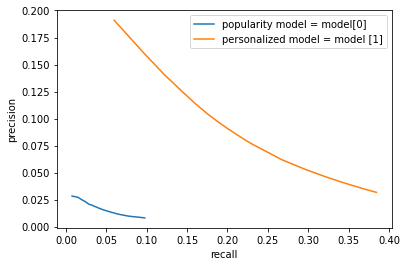

In [35]:
%matplotlib inline
#comparing the models on a small fraction of the test data
model_performance = tc.recommender.util.compare_models(test_data, [popularity_model, personalized_model])
plt.plot(model_performance[0]['precision_recall_overall']['recall'],
             model_performance[0]['precision_recall_overall']['precision'],
             label= "popularity model = model[0]")
plt.plot(model_performance[1]['precision_recall_overall']['recall'],
             model_performance[1]['precision_recall_overall']['precision'],
             label='personalized model = model [1]')
#plt.plot([0, .25], [0, 1], color='navy', linestyle='--')
#plt.xlim([0.0, .13]) # defines width of x-axis
#plt.ylim([0.0, .05]) # defines height of y-axis
plt.xlabel('recall') # labels the x-axis
plt.ylabel('precision') # labels the y-axis
plt.legend() # adds the legend according to labels above in plt.plot(model.....)
plt.show()

The table shows that the personalized model provides much better performance.

In [36]:
#Assignment Question
#Question 1: Counting Unique Users.
# 'Kanye West', 'Foo Fighters', 'Taylor Swift' and 'Lady GaGa'
users = song_data['user_id'].unique()
len(users)

66346

In [42]:
Kanye = song_data[song_data['artist'] == 'Kanye West']['user_id'].unique()
len(Kanye)

2522

In [43]:
Foo = song_data[song_data['artist'] == 'Foo Fighters']['user_id'].unique()
len(Foo)

2055

In [44]:
Taylor = song_data[song_data['artist'] == 'Taylor Swift']['user_id'].unique()
len(Taylor)

3246

In [45]:
Lady = song_data[song_data['artist'] == 'Lady GaGa']['user_id'].unique()
len(Lady)

2928

In [49]:
grouped = song_data.groupby(key_column_names='artist', operations={'total_count': tc.aggregate.SUM('listen_count')})
print(grouped)

+-------------------------------+-------------+
|             artist            | total_count |
+-------------------------------+-------------+
|           The Dells           |     274     |
|             16Volt            |     579     |
|         The Stray Cats        |     411     |
|    Billy Preston / Syreeta    |     189     |
|         Emma Shapplin         |     252     |
| Lil Jon & The East Side Bo... |     256     |
|             Spoon             |     1061    |
|           Sam & Dave          |     656     |
|           Blue Swede          |     266     |
|            Scooter            |     1202    |
+-------------------------------+-------------+
[3375 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [52]:
grouped.topk('total_count',k=10,reverse=True)

artist,total_count
William Tabbert,14
Reel Feelings,24
Beyoncé feat. Bun B andSlim Thug ...,26
Diplo,30
Boggle Karaoke,30
harvey summers,31
Nâdiya,36
Jody Bernal,38
Kanye West / Talib Kweli/ Q-Tip / Common / ...,38
Aneta Langerova,38


In [51]:
grouped.topk('total_count',k=10,reverse=False)

artist,total_count
Kings Of Leon,43218
Dwight Yoakam,40619
Björk,38889
Coldplay,35362
Florence + The Machine,33387
Justin Bieber,29715
Alliance Ethnik,26689
OneRepublic,25754
Train,25402
The Black Keys,22184
